In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import datetime as dt 
from _measurements import * 
from _weight_optimization import *
from _time_varying_optimization import *
from _regime_detection import *
import seaborn as sns 
import pytse_client as tse 
import matplotlib.pyplot as plt
from _plot_functions import *
import os
sns.set_theme()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']

data = yf.download(symbols, start="2010-01-01")["Close"]
returns = data.pct_change()
returns.dropna(inplace=True)
returns.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,AMZN,GOOGL,JPM,MSFT
Date,,,,,
2010-01-05,0.001729,0.005900,-0.004404,0.019370,0.000323
2010-01-06,-0.015906,-0.018116,-0.025209,0.005494,-0.006137
2010-01-07,-0.001849,-0.017013,-0.023280,0.019809,-0.010400
2010-01-08,0.006648,0.027077,0.013331,-0.002456,0.006897
2010-01-11,-0.008821,-0.024041,-0.001512,-0.003357,-0.012720


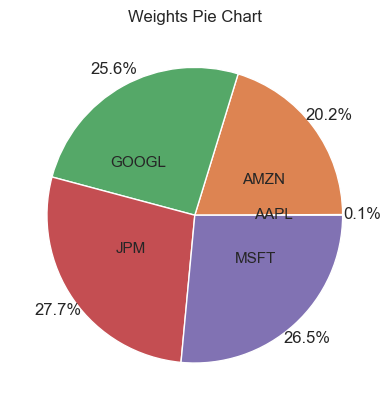

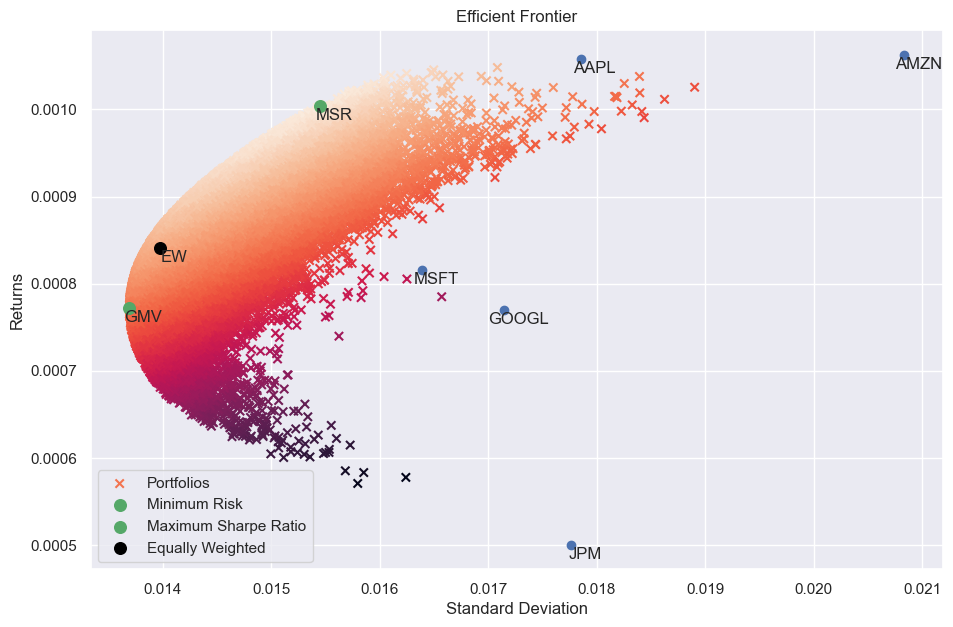

In [7]:
plot = Plotting(returns)
w = np.random.random(5)
w = w / w.sum()
plot.plot_weights(w) 
plot.plot_efficient_frontier()

In [64]:
methods_mu = ['historical', 'EWMA', 'shrunk', 'ledoit', 'oracle']
methods_cov = ['historical', 'EWMA', 'shrunk', 'ledoit', 'oracle']

obj_functions = ['max_return', 'min_risk', 'max_sharpe', 'max_utility', 'risk_parity']
final_results = {}

for i in range(len(methods_cov)):
    method_mu = methods_mu[i]
    method_cov = methods_cov[i]
    
    for objective in obj_functions:
        params = {
            "start": 30,
            "test_low": 30, 
            "test_high": 1000, 
            "step": 15, 
            "method_mu": method_mu, 
            "method_cov": method_cov, 
            "objective": objective
        }
        eto = ExpandingTimeOptimization(returns, params=params)
        results = eto()
        final_results[f"{method_mu}_{method_cov}_{objective}"] = results
        
final_results

{'historical_historical_max_return': [                       optimzied_portfolio  equal_portfolio
  Cumulative Return                   43.378          121.764
  Annualized Return                    0.399            0.531
  Maximum Drawdown                     0.736            0.685
  Annualized Volatility                0.524            0.456
  Sharpe Ratio                         0.763            1.166
  Sortino Ratio                        1.088            1.525
  Kurtosis                             5.453            6.415
  Skewness                             0.280           -0.334
  VaR Historical                       0.049            0.046
  CVaR Historical                      0.003            0.001
  VaR Gaussian                         0.052            0.045
  CVaR Gaussian                        0.002            0.001
  VaR Nongaussian                      0.046            0.044
  CVaR Nongaussian                     0.003            0.001,
                         optimzie

# Historical Plots

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["historical_historical_max_return"])[:, k, 0]
        eq = np.array(final_results["historical_historical_max_return"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="historical_max_return",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["historical_historical_min_risk"])[:, k, 0]
        eq = np.array(final_results["historical_historical_min_risk"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="historical_min_risk",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative utility",
    "Annualized utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["historical_historical_max_utility"])[:, k, 0]
        eq = np.array(final_results["historical_historical_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="historical_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative sharpe",
    "Annualized sharpe",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["historical_historical_max_sharpe"])[:, k, 0]
        eq = np.array(final_results["historical_historical_max_sharpe"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="historical_max_sharpe",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["historical_historical_risk_parity"])[:, k, 0]
        eq = np.array(final_results["historical_historical_risk_parity"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="historical_risk_parity",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

# EWMA Plots

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["EWMA_EWMA_max_return"])[:, k, 0]
        eq = np.array(final_results["EWMA_EWMA_max_return"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="EWMA_max_return",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["EWMA_EWMA_min_risk"])[:, k, 0]
        eq = np.array(final_results["EWMA_EWMA_min_risk"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="EWMA_min_risk",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative_utility",
    "Annualized_utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["EWMA_EWMA_max_utility"])[:, k, 0]
        eq = np.array(final_results["EWMA_EWMA_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="EWMA_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative sharpe",
    "Annualized sharpe",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["EWMA_EWMA_max_sharpe"])[:, k, 0]
        eq = np.array(final_results["EWMA_EWMA_max_sharpe"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="EWMA_max_sharpe",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["EWMA_EWMA_risk_parity"])[:, k, 0]
        eq = np.array(final_results["EWMA_EWMA_risk_parity"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="EWMA_risk_parity",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

# Shrunk Method

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_max_return"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_max_return"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_max_return",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_min_risk"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_min_risk"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_min_risk",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative utility",
    "Annualized utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_max_utility"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative sharpe",
    "Annualized sharpe",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_max_sharpe"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_max_sharpe"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_max_sharpe",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative Return",
    "Annualized Return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "Sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_risk_parity"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_risk_parity"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_risk_parity",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

# oracle

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["oracle_oracle_max_return"])[:, k, 0]
        eq = np.array(final_results["oracle_oracle_max_return"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="oracle_max_return",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["oracle_oracle_min_risk"])[:, k, 0]
        eq = np.array(final_results["oracle_oracle_min_risk"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="oracle_min_risk",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [82]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative utility",
    "Annualized utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "utility Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["shrunk_shrunk_max_utility"])[:, k, 0]
        eq = np.array(final_results["shrunk_shrunk_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="shrunk_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [83]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative utility",
    "Annualized utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "utility Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["oracle_oracle_max_utility"])[:, k, 0]
        eq = np.array(final_results["oracle_oracle_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="oracle_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative sharpe",
    "Annualized sharpe",
    "Maximum Drawdown",
    "Annualized Volatility",
    "sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["oracle_oracle_max_sharpe"])[:, k, 0]
        eq = np.array(final_results["oracle_oracle_max_sharpe"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="oracle_max_sharpe",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["oracle_oracle_risk_parity"])[:, k, 0]
        eq = np.array(final_results["oracle_oracle_risk_parity"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="oracle_risk_parity",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

# ledoit

In [86]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["ledoit_ledoit_max_return"])[:, k, 0]
        eq = np.array(final_results["ledoit_ledoit_max_return"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="ledoit_max_return",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [87]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["ledoit_ledoit_min_risk"])[:, k, 0]
        eq = np.array(final_results["ledoit_ledoit_min_risk"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="ledoit_min_risk",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative utility",
    "Annualized utility",
    "Maximum Drawdown",
    "Annualized Volatility",
    "utility Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["ledoit_ledoit_max_utility"])[:, k, 0]
        eq = np.array(final_results["ledoit_ledoit_max_utility"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="ledoit_max_utility",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative sharpe",
    "Annualized sharpe",
    "Maximum Drawdown",
    "Annualized Volatility",
    "sharpe Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["ledoit_ledoit_max_sharpe"])[:, k, 0]
        eq = np.array(final_results["ledoit_ledoit_max_sharpe"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="ledoit_max_sharpe",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()

In [90]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the titles for the subplots
titles = [
    "Cumulative return",
    "Annualized return",
    "Maximum Drawdown",
    "Annualized Volatility",
    "return Ratio",
    "Sortino Ratio"
]

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=titles, vertical_spacing=0.1)

# Define the colors for equal and optimized portfolios
equal_color = "red"
optimized_color = "blue"

# Loop through the subplots
k = 0
for i in range(1, 4):
    for j in range(1, 3):
        pf = np.array(final_results["ledoit_ledoit_risk_parity"])[:, k, 0]
        eq = np.array(final_results["ledoit_ledoit_risk_parity"])[:, k, 1]
        x = np.arange(pf.shape[0])

        # Add traces to the subplot with the specified colors
        fig.add_trace(go.Scatter(x=x, y=pf, name="optimized portfolio", line=dict(color=optimized_color)), row=i, col=j)
        fig.add_trace(go.Scatter(x=x, y=eq, name="equal portfolio", line=dict(color=equal_color)), row=i, col=j)

        k += 1

# Update subplot layout
fig.update_layout(
    title="ledoit_risk_parity",
    showlegend=True,
    height=800,
    width=1000,
)

# Show the plot
fig.show()